In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#import data
Tesla=pd.read_csv('../dataset/new/TSLA.csv',index_col='Date')
Tesla.index=pd.to_datetime(Tesla.index)

GM=pd.read_csv('../dataset/new/GM.csv',index_col='Date')
GM.index=pd.to_datetime(GM.index)

Ford=pd.read_csv('../dataset/new/FORD.csv',index_col='Date')
Ford.index=pd.to_datetime(Ford.index)

Tesla.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


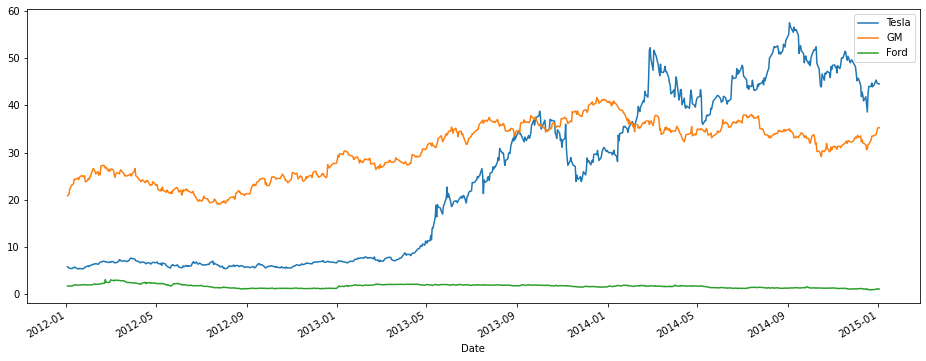

In [3]:
plt.figure(figsize=(16,6))
Tesla['Open'].plot()
GM['Open'].plot()
Ford['Open'].plot()
plt.legend(['Tesla','GM','Ford'],loc='upper right')

(15342.0, 16437.0)

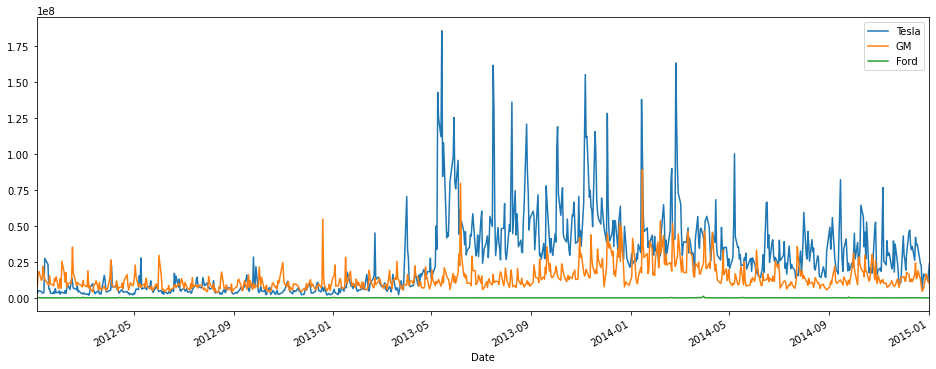

In [4]:
plt.figure(figsize=(16,6))
Tesla['Volume'].plot()
GM['Volume'].plot()
Ford['Volume'].plot()
plt.legend(['Tesla','GM','Ford'],loc='upper right')
plt.xlim(Tesla.index[0],Tesla.index[-1])

(15342.0, 16437.0)

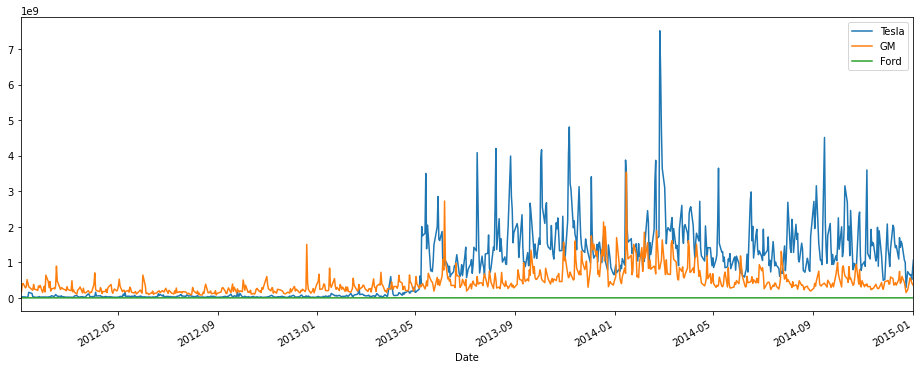

In [5]:
Tesla['Total Traded']=Tesla['Open']*Tesla['Volume']
GM['Total Traded']=GM['Open']*GM['Volume']
Ford['Total Traded']=Ford['Open']*Ford['Volume']

plt.figure(figsize=(16,6))
Tesla['Total Traded'].plot()
GM['Total Traded'].plot()
Ford['Total Traded'].plot()
plt.legend(['Tesla','GM','Ford'],loc='upper right')
plt.xlim(Tesla.index[0],Tesla.index[-1])

In [7]:
Tesla['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

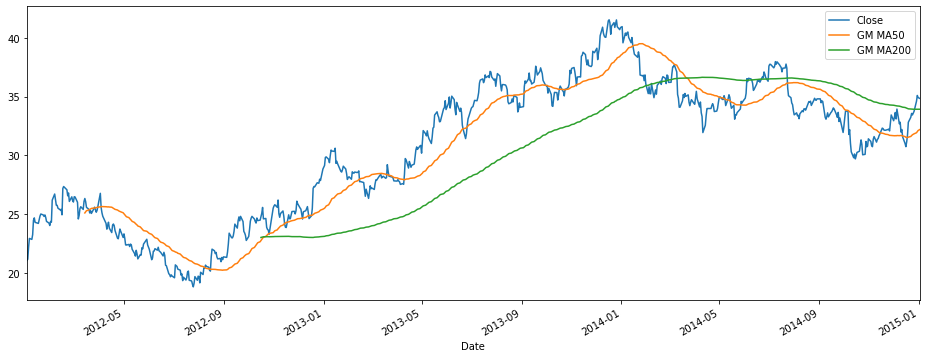

In [8]:
GM['Close'].plot(figsize=(16,6),xlim=(GM.index[0],GM.index[-1]),label='Close')
GM['Close'].rolling(50).mean().plot(label='GM MA50')
GM['Close'].rolling(200).mean().plot(label='GM MA200')
plt.legend()

array([[<AxesSubplot:xlabel='Tesla', ylabel='Tesla'>,
        <AxesSubplot:xlabel='GM', ylabel='Tesla'>,
        <AxesSubplot:xlabel='Ford', ylabel='Tesla'>],
       [<AxesSubplot:xlabel='Tesla', ylabel='GM'>,
        <AxesSubplot:xlabel='GM', ylabel='GM'>,
        <AxesSubplot:xlabel='Ford', ylabel='GM'>],
       [<AxesSubplot:xlabel='Tesla', ylabel='Ford'>,
        <AxesSubplot:xlabel='GM', ylabel='Ford'>,
        <AxesSubplot:xlabel='Ford', ylabel='Ford'>]], dtype=object)

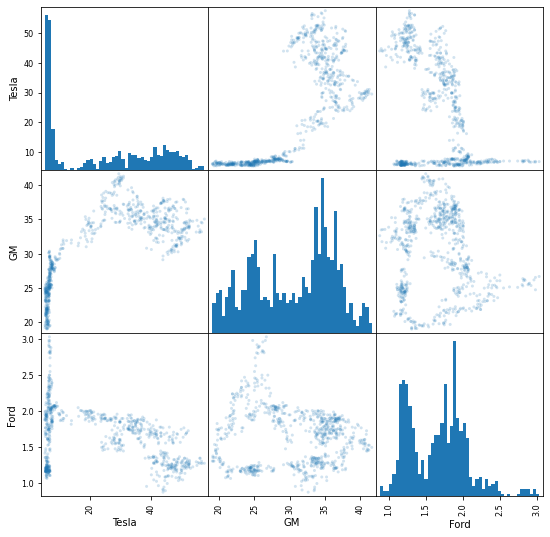

In [9]:
from pandas.plotting import scatter_matrix
stockOpen=pd.DataFrame(columns=['Tesla','GM','Ford'],index=GM.index)
stockOpen['Tesla']=Tesla['Open']
stockOpen['GM']=GM['Open']
stockOpen['Ford']=Ford['Open']
#stockOpen = pd.concat([Tesla['Open'],GM['Open'],Ford['Open']],axis=1)
scatter_matrix(stockOpen.dropna(), alpha=0.2, figsize=(9, 9), hist_kwds={'bins':50})

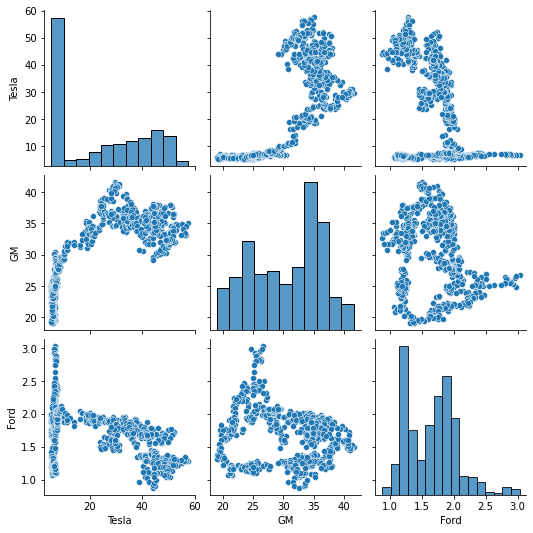

In [10]:
import seaborn as sns
sns.pairplot(stockOpen.dropna())

(array([  1.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   2.,
          1.,   1.,   6.,   6.,   8.,  16.,  29.,  31.,  46.,  80., 107.,
        104.,  90.,  80.,  46.,  27.,  23.,  10.,   7.,   6.,   2.,   6.,
          3.,   1.,   0.,   0.,   1.,   3.,   0.,   2.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.19327434, -0.18452984, -0.17578534, -0.16704084, -0.15829635,
        -0.14955185, -0.14080735, -0.13206286, -0.12331836, -0.11457386,
        -0.10582936, -0.09708487, -0.08834037, -0.07959587, -0.07085137,
        -0.06210688, -0.05336238, -0.04461788, -0.03587338, -0.02712889,
        -0.01838439, -0.00963989, -0.0008954 ,  0.0078491 ,  0.0165936 ,
         0.0253381 ,  0.03408259,  0.04282709,  0.05157159,  0.06031609,
         0.06906058,  0.07780508,  0.08654958,  0.09529407,  0.10403857,
         0.11278307,  0.12152757,  0.13027206,  0.13901656,  0.14776106,
         0.15650556,  0.16525005,  0.17399455,  0.18273905,  0.19148354,
 

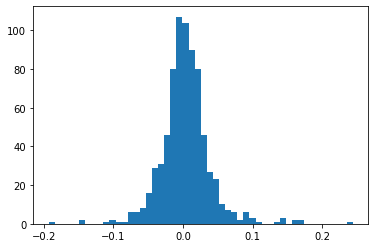

In [18]:
Tesla['Return']=(Tesla['Close']-Tesla['Close'].shift(1))/Tesla['Close'].shift(1)
Tesla=Tesla.dropna()


GM['Return']=(GM['Close']-GM['Close'].shift(1))/GM['Close'].shift(1)
GM=GM.dropna()

Ford['Return']=(Ford['Close']-Ford['Close'].shift(1))/Ford['Close'].shift(1)
Ford=Ford.dropna()
# import ffn
# GM['Return']=ffn.to_returns(GM['Close'])

# Ford['Return']=Ford['Close'].pct_change(1)
# Ford=Ford.dropna()
plt.hist(Tesla['Return'],bins=50)

<ipython-input-19-63f484a071b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ford['Cumulative Return']=(1+Ford['Return']).cumprod()


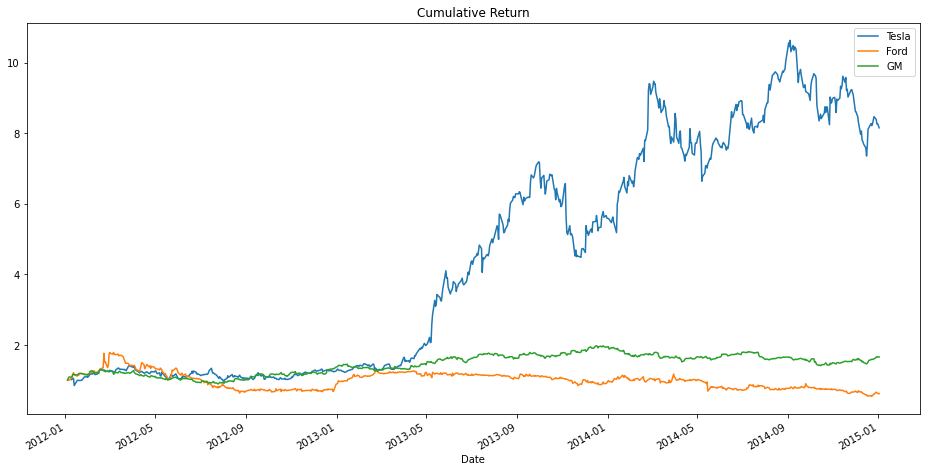

In [19]:
Tesla['Cumulative Return']=(1+Tesla['Return']).cumprod()
GM['Cumulative Return']=(1+GM['Return']).cumprod()
Ford['Cumulative Return']=(1+Ford['Return']).cumprod()


Tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
Ford['Cumulative Return'].plot(label='Ford')
GM['Cumulative Return'].plot(label='GM')
plt.legend()

In [22]:
#import data
Tesla=pd.read_csv('../dataset/new/TSLA.csv',index_col='Date')
Tesla.index=pd.to_datetime(Tesla.index)

GM=pd.read_csv('../dataset/new/GM.csv',index_col='Date')
GM.index=pd.to_datetime(GM.index)

Ford=pd.read_csv('../dataset/new/FORD.csv',index_col='Date')
Ford.index=pd.to_datetime(Ford.index)


#count daily return
GM['Return']=GM['Close'].pct_change(1)
GM=GM.dropna()
Tesla['Return']=Tesla['Close'].pct_change(1)
Tesla=Tesla.dropna()
Ford['Return']=Ford['Close'].pct_change(1)
Ford=Ford.dropna()

#concatenate daily return of three stocks
ret_df=pd.concat([Tesla['Return'],GM['Return'],Ford['Return']],axis=1)
ret_df.columns=['Tesla','GM','Ford']
ret_df.head()

,Tesla,GM,Ford
Date,,,
2012-01-04,-0.013177,0.004751,-0.005988
2012-01-05,-0.021292,0.048227,0.006024
2012-01-06,-0.007743,0.033829,0.000000
2012-01-09,0.012635,-0.003490,0.047904
2012-01-10,0.013578,0.017513,0.011429


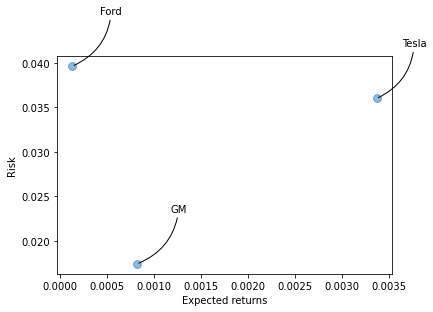

In [26]:
area = np.pi*20
plt.scatter(ret_df.mean(), ret_df.std(),alpha = 0.5,s =area)
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(ret_df.columns, ret_df.mean(), ret_df.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))